In [15]:
import numpy as np

# data
cl=1000
samples = 100
states = np.linspace(0, cl, samples+1)

np.random.seed(124)

x = np.random.uniform(0, 1, size=samples)
y = np.random.uniform(0, 1, size=samples)
# rm 0 state
if len(states) == len(x) + 1:
    states = np.delete(states, 0)

print("chain length = ", cl, "; sample size = ", samples)
print("len(states)", len(states), "== len(x)", len(x), "is", len(states) == len(x))
#print("states = ", states)
#print("x = ", x)

chain length =  1000 ; sample size =  100
len(states) 100 == len(x) 100 is True


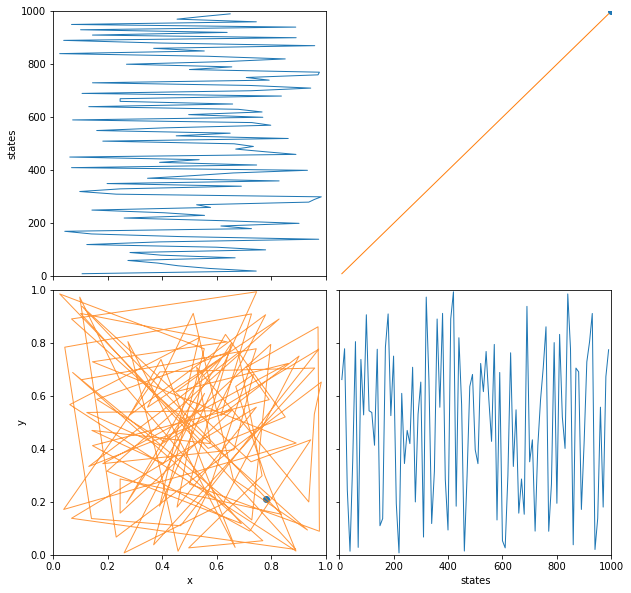

In [32]:
#http://twiecki.github.io/blog/2014/01/02/visualizing-mcmc/
import matplotlib.pyplot as plt
from matplotlib import animation

fig = plt.figure(figsize=(10,10))
x_width = (0, 1)
y_width = (0, 1)
states_width = (0, cl)
ax1 = fig.add_subplot(221, xlim=x_width, ylim=states_width, ylabel='states')
ax2 = fig.add_subplot(224, xlim=states_width, ylim=y_width, xlabel='states')
ax3 = fig.add_subplot(223, xlim=x_width, ylim=y_width, xlabel='x', ylabel='y')
# the tree plan
ax4 = fig.add_subplot(222, xlim=states_width, ylim=states_width)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
ax1.set_xticklabels([])
ax2.set_yticklabels([])
ax4.axis('off')

line1, = ax1.plot([], [], lw=1)
line2, = ax2.plot([], [], lw=1)
# dot
line3, = ax3.plot([], [], 'o', lw=3)
line4, = ax3.plot([], [], lw=1, alpha=.8)
# tree (A,(B,C))
#node1, = ax4.plot([], [], 'o', lw=3)
edge1, = ax4.plot([], [], lw=1)
edge2, = ax4.plot([], [], lw=1)
edge3, = ax4.plot([], [], lw=1)
edge4, = ax4.plot([], [], lw=1)
#path = plt.scatter([], [])
lines = [line1, line2, line3, line4, line5, line6]

def init():
    for line in lines:
        line.set_data([], [])
    return lines 

def animate(i):
    line1.set_data(x[:i], states[:i])
    line2.set_data(states[:i], y[:i])
    line3.set_data(x[i], y[i])
    line4.set_data(x[:i], y[:i])
    #TODO 
    edge1.set_data(states[i], states[i])
    edge2.set_data(states[:i], states[:i])
    edge3.set_data(states[i], states[i])
    edge4.set_data(states[:i], states[:i])
    return lines 

# interval : Delay between frames in milliseconds. Defaults to 200.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=samples, 
                               interval=5, blit=True, repeat=True)

anim.save('uniformXYTree.mp4', fps=1, extra_args=['-vcodec', 'libx264'])
plt.show()